#### California - USA Houseprices - Dataset 2 - Corrected - Excercise 1 - Timothy Gregorian

In this project, I used the same U.S. housing dataset as before (All_States_USA_ANN_Regression.ipynb) but focused only on the US state California. The goal was to test whether reducing the variable state to one state could improve the overall model performance and increase the R² score compared to using all states.

#### Note
Throughout the project, I followed the lecturer’s GitHub code structure and methodology as closely as possible, and only used AI and external sources when no examples were available in the provided GitHub scripts.

#### Link to Dataset 2
https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

#### Information about the Dataset
This USA Housing Market Dataset contains around 2.2 million rows and 12 columns of real-estate related data, which can be used for housing price predictions.

#### Data Description
The dataset contains thousands of housing records from different U.S. states and includes multiple variables that can affect property prices. Some of the key variables are:

1) brokered_by: Real estate agency or broker responsible for the listing.

2) status: Current status of the property.

3) price: Selling price of the house -> target variable.

4) bed: Number of bedrooms.

5) bath: Number of bathrooms.

6) acre_lot: Lot size in acres.

7) street: Street address of the property.

8) city: City where the house is located.

9) state: State where the house is located.

10) zip_code: Postal code of the property.

11) house_size: Total living area of the house in square feet.

12) prev_sold_date: Date when the property was previously sold.

#### Imports / Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset

In [5]:
df = pd.read_csv("realtor-data.zip.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


#### Handle missing values
We have many missing values:

In [6]:
df.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

#### AI was used in this code cell
I used AI fo this code cell, to find the optimal code for sampling only data for the state "California":

In [7]:
core_cols = ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot',
             'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']
df = df.dropna(subset=core_cols)

print("Shape after removing missing values:", df.shape)

df = df[df['state'] == "California"]

print("Shape after filtering for California:", df.shape)


Shape after removing missing values: (1084909, 12)
Shape after filtering for California: (157724, 12)


No missing values and no duplicates anymore:

In [8]:
df.isna().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

In [9]:
int(df.duplicated().sum())

0

In [10]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1208998,4311.0,for_sale,172999.0,3.0,2.0,0.16,987585.0,Blythe,California,92225.0,1132.0,1984-06-29
1209113,4311.0,for_sale,201000.0,2.0,2.0,0.34,761139.0,Blythe,California,92225.0,1100.0,1997-09-23
1209116,76008.0,for_sale,250000.0,7.0,3.0,0.19,1002149.0,Blythe,California,92225.0,3126.0,2015-09-23
1209118,86230.0,for_sale,325000.0,3.0,2.0,5.00,664584.0,Blythe,California,92225.0,1925.0,1985-01-14
1209120,22611.0,for_sale,287500.0,5.0,3.0,0.20,1230938.0,Blythe,California,92225.0,1642.0,2018-03-08


Now we drop any unnecessary variables:

In [11]:
columns_to_delete = ["brokered_by", "status", "street", "city", "state", "prev_sold_date"]
df = df.drop(columns=columns_to_delete)
df.head()

,price,bed,bath,acre_lot,zip_code,house_size
1208998,172999.0,3.0,2.0,0.16,92225.0,1132.0
1209113,201000.0,2.0,2.0,0.34,92225.0,1100.0
1209116,250000.0,7.0,3.0,0.19,92225.0,3126.0
1209118,325000.0,3.0,2.0,5.00,92225.0,1925.0
1209120,287500.0,5.0,3.0,0.20,92225.0,1642.0


#### Artificial intelligence was used for this code cell
AI was used for this code cell because the initial attempt with Agglomerative Clustering caused a MemoryError of around 931 GB RAM, as the algorithm tried to process over 250 million data points.
To handle this issue, I used MiniBatchKMeans, which is more efficient and suitable for large datasets.
I also used AI since no example for this approach was available in the lecturer’s GitHub code scripts.

In [12]:
from sklearn.cluster import MiniBatchKMeans

X_zip = df[["zip_code"]].values

kmeans = MiniBatchKMeans(n_clusters=55, random_state=7, batch_size=10000)
df["ZipCodeCluster"] = kmeans.fit_predict(X_zip)

cluster_mean = df.groupby("ZipCodeCluster")["price"].mean()
df["ZipCodeClusterValue"] = df["ZipCodeCluster"].map(cluster_mean)
df = df.drop(columns=["zip_code", "ZipCodeCluster"])

In [35]:
df.head()

,price,bed,bath,acre_lot,house_size,ZipCodeClusterValue
1208998,172999.00,3.00,2.00,0.16,1132.00,736566.63
1209113,201000.00,2.00,2.00,0.34,1100.00,736566.63
1209116,250000.00,7.00,3.00,0.19,3126.00,736566.63
1209118,325000.00,3.00,2.00,5.00,1925.00,736566.63
1209120,287500.00,5.00,3.00,0.20,1642.00,736566.63


#### X/y-Split

In [14]:
X = df.drop("price", axis=1)

y = df["price"]

#### Correlation-Test

The correlation test shows that house_size, bath, and bed have the strongest positive relationships with price.
The variable ZipCodeClusterValue also shows a small positive correlation, indicating that the clustering of zip codes adds useful regional information to the model.

In [15]:
correlations = df.corr(numeric_only=True)
correlations

,price,bed,bath,acre_lot,house_size,ZipCodeClusterValue
price,1.000000,0.222524,0.374790,-0.001889,0.489352,0.254508
bed,0.222524,1.000000,0.765874,-0.006300,0.677425,0.019118
bath,0.374790,0.765874,1.000000,-0.002155,0.809167,0.123787
acre_lot,-0.001889,-0.006300,-0.002155,1.000000,-0.002963,-0.001294
house_size,0.489352,0.677425,0.809167,-0.002963,1.000000,0.093145
ZipCodeClusterValue,0.254508,0.019118,0.123787,-0.001294,0.093145,1.000000


#### Chi²-Test

The Chi² test results show that ZipCodeClusterValue has the highest score, indicating it provides the strongest relationship with the target variable price.
Other features such as acre_lot and house_size also contribute significantly, while bath and bed have lower importance.

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
4,ZipCodeClusterValue,18761183090.58
2,acre_lot,260696026.04
3,house_size,73073898.18
1,bath,60362.01
0,bed,35185.39


#### VIF-Test

The VIF test shows that bath and bed have higher multicollinearity values, indicating some correlation between these features.
In contrast, acre_lot, house_size, and ZipCodeClusterValue show lower VIF values.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

               feature   VIF
0                  bed 10.51
1                 bath 15.38
2             acre_lot  1.00
3           house_size  9.76
4  ZipCodeClusterValue  2.88


#### Train-/Test-/Validation-Split (70/30)

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [19]:
len(df)

157724

#### Create the neural network structure

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

variable_amount = len(X.columns)

mc = ModelCheckpoint('best_model_california_state.keras', monitor='val_loss', mode='min', save_best_only=True)

callback_list = [mc]

model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')
model.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,157 (43.58 KB)

 Trainable params: 11,147 (43.54 KB)

 Non-trainable params: 10 (40.00 B)

#### Train the neural network

In [21]:
model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 4959655428096.0000 - val_loss: 1569760739328.0000
Epoch 2/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4588795068416.0000 - val_loss: 1463421763584.0000
Epoch 3/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4499542900736.0000 - val_loss: 1413879037952.0000
Epoch 4/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4414045159424.0000 - val_loss: 1375984549888.0000
Epoch 5/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4364362055680.0000 - val_loss: 1357575356416.0000
Epoch 6/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4344681070592.0000 - val_loss: 1359941206016.0000
Epoch 7/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4289611431936.0000 - val_loss: 2417505337344.0000
Epoch 8/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4240614621184.0000 - val_loss: 4145884954624.0000
Epoch 9/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4225528233984.0000 - val_loss: 52280552325

#### Performance and Error Metrics

<Axes: >

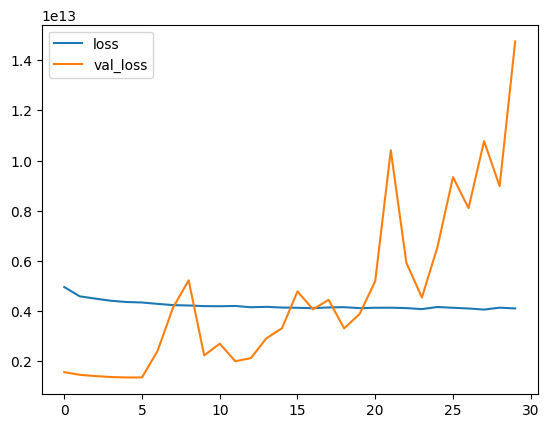

In [22]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

The graph shows the training and validation loss over 30 epochs.
The training loss remains relatively stable, while the validation loss increases sharply toward the end, indicating that the model begins to overfit and struggles to generalize data.

#### Load the best model version

In [ ]:
from keras.models import load_model
model = load_model("best_model_california_state.keras")

Since the training loss is slightly higher than the test loss, the model demonstrates a balanced performance without strong signs of overfitting.

In [24]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
3046870089728.0

Train data evaluation:
4465339924480.0


In [25]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step


,Test True Y,Model Predictions
0,925000.00,1148235.62
1,799000.00,745709.19
2,475000.00,514493.12
3,899000.00,910884.75
4,575000.00,484906.75
...,...,...
23654,900000.00,825647.31
23655,679000.00,477235.34
23656,728888.00,1022767.75
23657,450000.00,582456.00


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

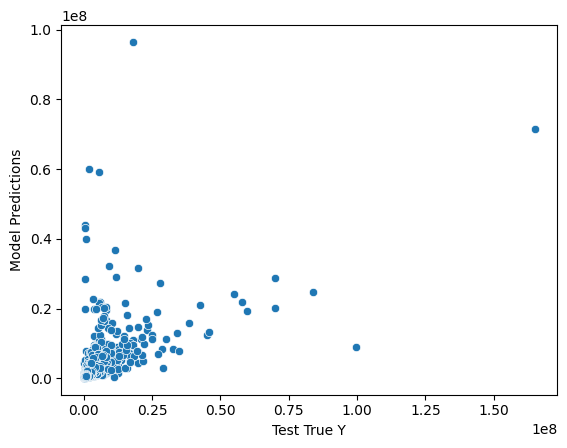

In [26]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [27]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
398051.65 $

MSE
3046868915168.33 $^2

RMSE:
1745528.26 $

R-squared:
0.37

Explained variance score:
0.37


With an R²-score of 0.37 and an explained variance of 0.37, the model explains about 37 % of the variation in house prices, showing a moderate improvement in predictive accuracy.

In [29]:
df.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'house_size',
       'ZipCodeClusterValue'],
      dtype='object')

#### Trying the model in practice with new imaginery house

In [40]:
tester_row = {
    "bed": 4,
    "bath": 3,
    "acre_lot": 0.14,
    "house_size": 3054.0,
    "ZipCOdeClusterValue": 379850,
}

tester_row = pd.DataFrame([tester_row])

In [41]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated house price:")
print(f"$ {round(float(result[0]), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Estimated house price:
$ 736333.75
----------------


#### Conclusion
In this project, the model was trained using housing data exclusively from the state of California.

Several feature engineering and statistical methods were applied, including OneHotEncoding, LabelEncoding and MiniBatchKMeans.

After model training, the R²-score reached 0.37, and the explained variance score was also 0.37, indicating that the model was able to explain around 37% of the variation in house prices.

Throughout this project, I followed the lecturer’s GitHub code structure as closely as possible. I only used AI or external sources when I could not find suitable examples or methods in the provided GitHub scripts.

Overall, the project demonstrates that even when using data from a single U.S. state as well as clustering can significantly enhance model performance.